## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. 

Дополнительное внимание необходимо уделить фильмам, которые получили государственную поддержку.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования:** провести исследовательский анализ данных

**Ход исследования:**
1. Импорт и объединение данных
2. Обзор данных
3. Предварительная обработка данных
4. Исследовательский анализ данных (в том числе дополнительный анализ данных фильмов с государственной поддержкой)

**Используемые библиотеки:**
1. pandas
2. matplotlib.pyplot

### Импорт и объединение данных

Подключение библиотек, необходимых для исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Импорт данных:

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

### Обзор данных

Перед объединением данных необходимо провести их общий обзор:

In [3]:
mkrf_movies.info()
print('--------------')
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null 

Данные необходимо объединить по номеру прокатного удостоверения, однако эти столбцы в двух наборах данных имеют разный тип, поэтому выполним преобразование к числовому типу данных и произведем объединение:

In [4]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
films = mkrf_movies.merge(mkrf_shows, how='left')

Объединение данных произошло успешно. Теперь необходимо провести обзор данных:

In [5]:
display(films.head())
films.info()
display(films.describe())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


В таблице 16 столбцов с различными типами данных и 7486 строк. Согласно документации к набору данных:

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма;
* box_office — сборы в рублях в российских кинотеатрах.

Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Общий обзор данных позволяет обнаружить несколько проблем:
1. В большинстве столбцов присутствуют пропуски (часть из них вызвано объединением данных)
2. В данных присутствуют неявные дубликаты
3. В некоторых столбцах неверный тип данных
4. Присутствуют аномальные значения (например, нулевой бюджет фильма).

#### Вывод

После обзора данных можно предварительно заключить, что данные являются достаточными для проведения исследования, однако необходима предварительная обработка для корректности исследования.

### Предобработка данных

#### Обработка типов данных

Тип данных в столбце ratings требует приведения к вещественному типу:

In [6]:
films.ratings = pd.to_numeric(films.ratings, errors='coerce')

Тип данных в столбце puNumber требует приведения к целочисленному (он был изменен в процессе объединения двух источников данных). Однако из-за наличия пропущенного значения, приведение к целочисленному типу данных невозможно. Так как пропущенное значение всего одно, заменим его на -1 и приведем тип данных к целочисленному.

In [7]:
films.puNumber = films.puNumber.fillna(-1).astype('int64')

Дополнительно обработаем столбец show_start_date и переведем его в привычный читаемый формат:

In [8]:
films.show_start_date = pd.to_datetime(films.show_start_date, format='%Y-%m-%dT%H:%M:%S.%fZ')

##### Вывод

Все столбцы приведены к типам данных, соответствующим их смысловым наполнениям.

#### Обработка пропусков в данных

В данных довольно большое количество пропусков в разных столбцах.

Единственный пропуск в столбце puNumber был обработан на этапе приведения типов данных и заполнен значением -1.

Далее проверим пропущенные значения в film_studio:

In [9]:
films[films.film_studio.isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Никаких закономерностей в пропусках названия студии не наблюдается, поэтому заполним пропуски фразой "unknown studio" (в качестве альтернативы возможно заполнение пропусков ручным поиском студии производства каждого фильма в разнообразных источниках, однако, данный подход нецелесообразен).

In [10]:
films.film_studio.fillna('unknown studio', inplace=True)

Проверим пропущенные значения в production_country:

In [11]:
films[films.production_country.isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,unknown studio,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Таких пропусков всего два, поэтому можно вручную заполнить недостающие данные в столбце, уточнив данные в открытых источниках. Оба фильма произведены в России.

In [12]:
films.production_country.fillna('Россия', inplace=True)

Проверим пропущенные значения в столбцах director и producer:

In [13]:
display(films[films.director.isna()].head(3))
display(films[films.producer.isna()].head(3))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


Здесь ситуация, полностью аналогичная пропускам в студиях производства, поэтому проведем аналогичное заполнение пропусков значениями "unknown director"/"unknown producer".

In [14]:
films.director.fillna('unknown director', inplace=True)
films.producer.fillna('unknown producer', inplace=True)

Рассмотрим столбец genres:

In [15]:
films[films.genres.isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown producer,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown producer,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown producer,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Аналогично, заменим пропуски на "unknown genre":

In [16]:
films.genres.fillna('unknown genre', inplace=True)

Пропуски в стобцах refundable_support, nonrefundable_support, budget, financing_source заполнять некорреткно, так как в техническом задании указано, что значения в этих столбцах заполнены только для фильмов с государственной поддержкой.

В столбце ratings также некорректно заполнять пропуски, так как рейтинги фильма очень часто зависят лишь от предпочтений зрителей, а не от каких-либо других факторов.

В столбце box_office некорректно заполнять пропуски, так как они вызваны объединением двух источников данных.

Обработка пропусков завершена.

In [17]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 994.2+ KB


##### Вывод

На этапе обработки пропусков были устранены пропущенные значения там, где это возможно.

#### Обработка дубликатов

Проверим набор данных на предмет явных дубликатов:

In [18]:
print('Количество явных дубликатов:', films.duplicated().sum())

Количество явных дубликатов: 0


Явные дубликаты отсутствуют, однако, на этапе обзора данных были выявлены неявные дубликаты (например, в самом начале таблицы фильм "Особо опасен" встречается трижды, у него разные номера прокатных удостоверений и даты премьеры, однако, в таком случае, речь идёт о разных прокатных площадках, поэтому такие фильмы оставим без изменений. 

Проверим, какое количество дубликатов есть по столбцу с номерами прокатных удостоверений (в данном столбце все значения должны быть уникальными:

In [19]:
print('Количество дубликатов номеров прокатного удостоверения:', 
      films.puNumber.duplicated().sum())


Количество дубликатов номеров прокатного удостоверения: 2


Природа таких дубликатов вызвана, вероятнее всего, технической ошибкой при занесении номеров прокатных удостоверений в базу. Избавимся от таких дубликатов:

In [20]:
films = films[~films.puNumber.duplicated()]
films.reset_index(drop=True, inplace=True)

In [21]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
title                    7484 non-null object
puNumber                 7484 non-null int64
show_start_date          7484 non-null datetime64[ns]
type                     7484 non-null object
film_studio              7484 non-null object
production_country       7484 non-null object
director                 7484 non-null object
producer                 7484 non-null object
age_restriction          7484 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6488 non-null float64
genres                   7484 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 935.6+ KB


##### Вывод

Выполнен поиск неявных дубликатов. Дубликаты в данных устранены.

#### Обработка категориальных значений

Рассмотрим уникальные значения в столбцах с категориальными переменными (для емкости, ограничим вывод данных):

In [22]:
categ_columns = ['type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']
for col in categ_columns:
    print('Уникальные значения столбца', col, '\n')
    print(films[col].unique()[:30], '\n')

Уникальные значения столбца type 

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный'] 

Уникальные значения столбца film_studio 

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл'
 'Пульсар Продюксьон, ТФ1 Фильм ' 'Киностудия "Мосфильм", Телевидение ВНР'
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент'
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз'
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил'
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс'
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент И

В столбце type обнаружены неявные дубликаты типов фильмов (присутствует пробел перед типом фильма). Устраним данные дубликаты.

In [23]:
films.type = films.type.str.strip()

Также присутствует очевидная проблема в том, что в категориальных данных нет единой формы записи (т.е. на примере страны производства, страны могут быть записаны, как СССР-Венгрия или СССР, Венгрия), что приводит к избыточному "дроблению" на категории.

Ещё стоит обратить внимание на то, что в столбцах с именами продюссеров и режиссеров встречается разное написание имени (с сокращением и без), что также осложняет обработку данных столбцов.

##### Вывод

Устранены неявные дубликаты в столбце type, а также отмечены проблемы столбцов с категориальными данными.

#### Обработка количественных значений

Построим гистограммы для всех количественных столбцов:

Гистограмма столбца refundable_support


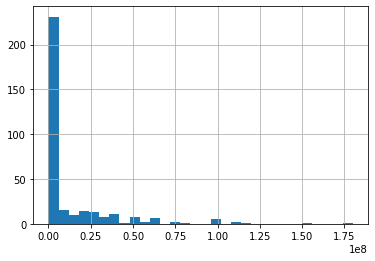

Гистограмма столбца nonrefundable_support


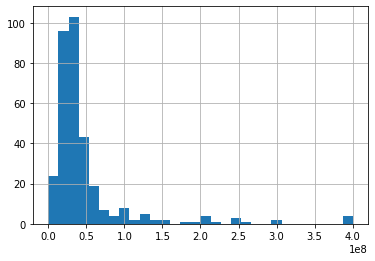

Гистограмма столбца budget


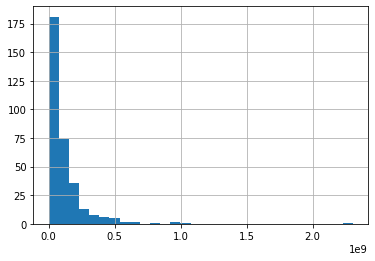

Гистограмма столбца ratings


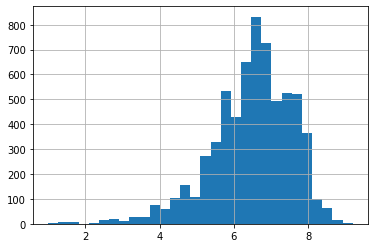

Гистограмма столбца box_office


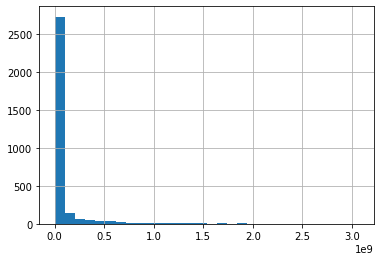

In [24]:
num_columns = ['refundable_support', 'nonrefundable_support', 'budget','ratings', 'box_office']
for col in num_columns:
    print('Гистограмма столбца', col)
    films[col].hist(bins=30)
    plt.show()

Комментарии по каждой гистограмме:

* Столбцы, содержащие значения возвратных и невозвратных средств государственной поддержки, выглядят вполне естественно.

* В столбце, содержащем бюджет фильма, есть нулевые значения, которые требуют дополнительного исследования.

* Столбец, содержащий рейтинги фильмов, выглядт вполне естественно, распределение несколько похоже на нормальное.

* В столбце, содержащем кассовые сборы, есть нулевые значения, которые требуют дополнительного исследования.

Введем дополнительную таблицу films_gov, в которой содержатся только фильмы, о бюджетах которых есть информация.

In [25]:
films_gov = films[films['budget'].notna()].reset_index(drop=True)

Введем в таблицу films_gov дополнительные столбцы:
1. goverment_support, содержащий полный объем государственной поддержки
2. budget_delta, содержащий разницу между бюджетом и полным объемом государственной поддержки.

In [26]:
films_gov['goverment_support'] = films_gov.nonrefundable_support + films_gov.refundable_support
films_gov['budget_delta'] = films_gov.budget - films_gov.goverment_support

Построим гистограмму budget_delta:

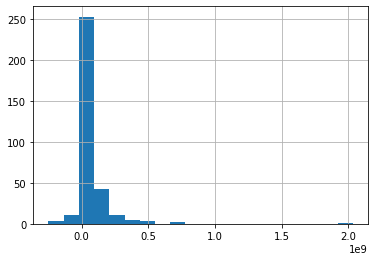

In [27]:
films_gov.budget_delta.hist(bins=20);

Очевидно присутствуют значения, где размер бюджета ниже размера государственной поддержки. Рассмотрим такие значения подробнее:

In [28]:
films_gov[films_gov.budget_delta < 0].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,goverment_support,budget_delta
15,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,23000000.0,-23000000.0
16,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,75000000.0,-75000000.0
40,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,80000000.0,-80000000.0
48,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,20000000.0,-20000000.0
66,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,160000000.0,-160000000.0
70,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,59000000.0,-59000000.0
84,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,35000000.0,-35000000.0
91,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,6000000.0,-6000000.0
109,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,70000000.0,-70000000.0
161,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,250000000.0,-250000000.0


Нетрудно заметить, что такие "странные" значения разницы бюджета появляются там, где бюджет фильма равен нулю. Логично высказать предположение, что нулевой бюджет указан у фильмов, снятых полностью за государственные деньги. Для этого дополнительно проверим, сколько строк содержат разницу бюджета и поддержки, равную нулю:

In [29]:
print('Количество строк, содержащих нулевую разницу бюджета и государственной поддержки:', 
      len(films_gov[films_gov.budget_delta == 0]))

Количество строк, содержащих нулевую разницу бюджета и государственной поддержки: 0


Гипотеза подтвердилась, а значит, можно заменить нулевые значения суммарным значением государственной поддержки (применим замену для обеих таблиц).

In [30]:
films_gov.loc[films_gov.budget_delta < 0, 'budget'] = films_gov.loc[films_gov.budget_delta < 0, 'goverment_support']
films_gov['budget_delta'] = films_gov.budget - films_gov.goverment_support
films.loc[films.budget == 0, 'budget'] = films.loc[films.budget == 0, 'refundable_support'] + films.loc[films.budget == 0,
                                                                                                        'nonrefundable_support']

Далее проверим значения столбца box_office:

In [31]:
print('Количество фильмов с кассовыми сборами менее 10000 рублей:', len(films[films.box_office < 10000]))
films[films.box_office < 10000].head()

Количество фильмов с кассовыми сборами менее 10000 рублей: 539


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown producer,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown producer,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown producer,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown producer,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown producer,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0


В таблице присутствует часть фильмов, у которых очень низкие кассовые сборы в российских кинотеатрах (либо вообще отсутствуют).

Если исключить факт ошибки размерности (например, указано не в рублях, а тысячах рублей), то наиболее вероятная причина таких явлений: кассовые сборы в российских кинотеатрах закреплены за определенными номерами прокатных удостоверений. Соответственно, для старых фильмов, на которые получены прокатные удостоверения в современности, будут отображаться низкие кассовые сборы.

Приняв последнее утверждение верным, можно считать, что данные столбца box_office корректны.

##### Вывод

Проведен анализ всех количественных столбцов из набора данных. Изучены гистограммы распределений всех значений количественных переменных.

Обнаружены и устранены ошибочные данные в столбце budget.

Объяснены аномально низкие значения кассовых сборов в российских кинотеатрах.

#### Добавление новых столбцов

Введем дополнительный столбец, содержащий год премьерного показа, для менее строгой категоризации по дате.

In [32]:
films['year'] = films.show_start_date.dt.year
films_gov['year'] = films_gov.show_start_date.dt.year

Далее необходимо выделить главного режиссера и основной жанр фильма:

In [33]:
def main_word(value):
    return(value.split(',')[0])
films['main_genre'] = films.genres.apply(main_word)
films['main_director'] = films.director.apply(main_word)
films_gov['main_genre'] = films_gov.genres.apply(main_word)
films_gov['main_director'] = films_gov.director.apply(main_word)

Рассчитаем долю государственной поддержки от общего бюджета фильма:

In [34]:
films_gov['gov_perc'] = films_gov.goverment_support / films_gov.budget

##### Вывод

Из имеющегося набора данных выделены следующие столбцы: год премьерного показа фильма, имя и фамилия главного режиссера, основной жанр фильма, а также рассчитано значение процента государственной поддержки фильмов.

### Исследовательский анализ данных


#### Исследование количества фильмов, вышедших в прокат

Произведем расчёт количества вышедших в прокат фильмов, а также, количества фильмов, о показе в кинотеатре которых есть информация:

Общая доля фильмов, показанных в кинотеатрах с 2010 по 2019 год: 42.0%

Доля фильмов, показанных в кинотеатрах по годам:


,year,cin_perс
0,2010,10.68
1,2011,17.52
2,2012,21.59
3,2013,29.21
4,2014,34.57
5,2015,65.96
6,2016,64.30
7,2017,70.69
8,2018,53.31
9,2019,56.99


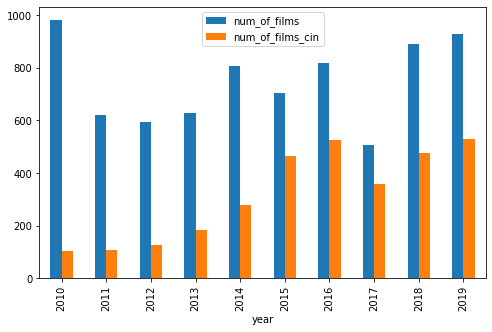

In [35]:
films_by_year = films.pivot_table(index='year', values='title', aggfunc='count')
films_by_year_cin = films[films.box_office.notna()].pivot_table(index='year', values='title', aggfunc='count')
films_by_year = films_by_year.reset_index()
films_by_year_cin = films_by_year_cin.reset_index()
films_by_year.columns = ['year', 'num_of_films']
films_by_year_cin.columns = ['year', 'num_of_films_cin']

films_by_year = films_by_year.merge(films_by_year_cin, how='left').fillna(0)
films_by_year.plot.bar(x='year', y=['num_of_films', 'num_of_films_cin'], figsize=(8,5));

print(f'''Общая доля фильмов, показанных в кинотеатрах с 2010 по 2019 год: {round(
films_by_year.num_of_films_cin.sum() / films_by_year.num_of_films.sum(), 2) * 100}%\n''')
print('Доля фильмов, показанных в кинотеатрах по годам:')
films_by_year['cin_perс'] = round(films_by_year.num_of_films_cin / 
                                  films_by_year.num_of_films * 100, 2)
films_by_year[['year','cin_perс']]

##### Вывод

Ознакомившись с распределениями данных можно сделать следующие выводы:

* В 2010 годы наблюдалось довольно большое количество вышедших в прокат фильмах, но среди прочих лет, в этом году был минимальный процент показа в кинотеатрах.
* С 2011 по 2016 год наблюдается парный рост как числа вышедших в прокат фильмов, так и числа показанных фильмов в кинотеатрах. Причём процент показанных в кинотеатрах фильмов в этот период возрастает с каждым годом.
* В 2017 году наблюдается резкий спад количества фильмов, вышедших в прокат (как следствие, спад показанных в кинотеатрах фильмов), но при этом в 2017 году самый высокий процет показанных в кинотеатрах фильмов.
* С 2018 по 2019 год наблюдается рост, аналогичный периоду 2011-2016, однако, процент показанных в кинотеатрах фильмов уже не растёт так существенно


#### Исследование динамики проката по годам

Исследуем динамику кассовых сборов по годам. Для этого построим график кассовых сборов в логарифмическом масштабе, а также рассчитаем основные показатели: суммарный кассовый сбор, среднее значение кассового сбора для каждого фильма, медианное значение кассового сбора для каждого фильма.

,year,total_box_office,mean_box_office,median_box_office
0,2010,2.428654e+06,2.313004e+04,1700.000
1,2011,1.410276e+07,1.293832e+05,3000.000
2,2012,6.955423e+06,5.433924e+04,5660.000
3,2013,2.979971e+07,1.619549e+05,3522.500
4,2014,7.444952e+09,2.668442e+07,18160.000
5,2015,3.949737e+10,8.494057e+07,4920933.000
6,2016,4.786630e+10,9.100057e+07,3846679.410
7,2017,4.856371e+10,1.360328e+08,9968340.000
8,2018,4.966840e+10,1.045651e+08,8891102.210
9,2019,4.842571e+10,9.136926e+07,4627798.345


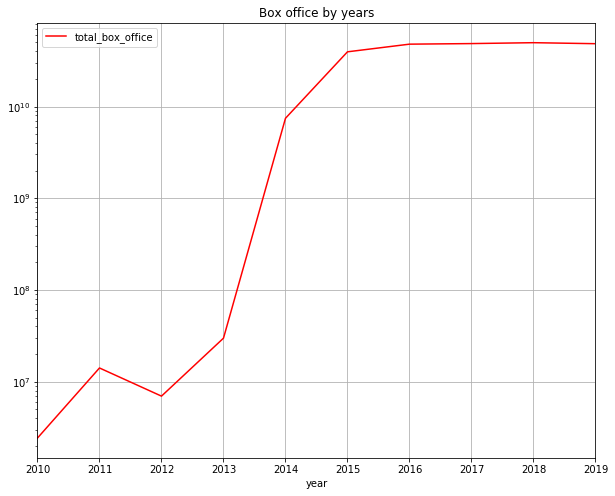

In [36]:
films_by_year_cin = films[films.box_office.notna()].pivot_table(
    index='year', values='box_office', aggfunc=['sum','mean','median'])
films_by_year_cin = films_by_year_cin.reset_index()
films_by_year_cin.columns = ['year', 'total_box_office', 'mean_box_office', 'median_box_office']
display(films_by_year_cin)
films_by_year_cin.plot(x='year', y='total_box_office', figsize=(10,8), grid=True, logy=True,
                      title='Box office by years', color='red');

Дополнительно рассмотрим среднее и медиану на срезе данных, из которого исключены фильмы с аномально низкими кассовыми сборами:

In [37]:
films[(films.box_office.notna()) & (films.box_office > 100000)].pivot_table(
    index='year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
year,,
2010,6.201470e+05,245630.00
2011,3.251634e+06,641375.00
2012,6.051211e+05,351643.00
2013,1.766003e+06,186090.00
2014,6.255049e+07,955970.50
2015,9.680330e+07,9432442.15
2016,1.038265e+08,6375092.00
2017,1.387523e+08,10668801.50


##### Вывод

Изучив графики и сводную таблицу можно сделать ряд интересных заключений:
* С 2013 года наблюдается резкий рост суммарных кассовых сборов. Рост продолжается до 2015 года, после которого резко прекращается и стагнирует.
* В данных присутствует очень существенная разница между медианными и средними значениями (от одного до нескольких порядков). Эта разница хорошо объясняется гипотезой, которая была выдвинута при исследовании столбца box_office. При исключении фильмов с низкими кассовыми сборами из рассмотрения, можно наблюдать несколько более реалистичную картину, в которой среднее и медианное значение расходятся не более чем на 2 порядка. Данные различия нетрудно объяснить тем, что очень популярные фильмы смещают значение среднего вправо. Причём, как косвенный показатель числа популярных фильмов в год можно рассматривать разницу между медианой и среднем. Чем больше разница, тем больше популярных фильмов было выпущено в рассматриваемом году.
* Максимально большие кассовые сборы были в 2018 году, а минимальные в 2010 году.



#### Исследование влияние возрастных ограничений на кассовые сборы фильмов в период с 2015 по 2019 год

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Посмотрим, как выглядят данные в разрезе возрастной категории, после чего дополнительно разделим данные на года премьерных показов:

,age_restriction,number_of_films,total_box_office,mean_box_office,median_box_office
0,0+,91,8.090774e+08,8.890961e+06,2943318.70
1,12+,348,6.061945e+10,1.741938e+08,5065044.25
2,16+,805,7.603473e+10,9.445309e+07,5600007.00
3,18+,792,4.075962e+10,5.146416e+07,6154439.17
4,6+,317,5.579861e+10,1.760209e+08,13736207.98


year,age_restriction,2015,2016,2017,2018,2019
0,0+,3.790546e+08,1.502288e+08,2.295989e+08,3.244900e+07,1.774607e+07
1,12+,1.361608e+10,1.220445e+10,7.851428e+09,1.426729e+10,1.268020e+10
2,16+,1.136812e+10,1.666455e+10,1.874504e+10,1.650360e+10,1.275342e+10
3,18+,5.432308e+09,6.793930e+09,9.651496e+09,8.760086e+09,1.012180e+10
4,6+,8.701799e+09,1.205315e+10,1.208614e+10,1.010497e+10,1.285255e+10


,0+,12+,16+,18+,6+
year,,,,,
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


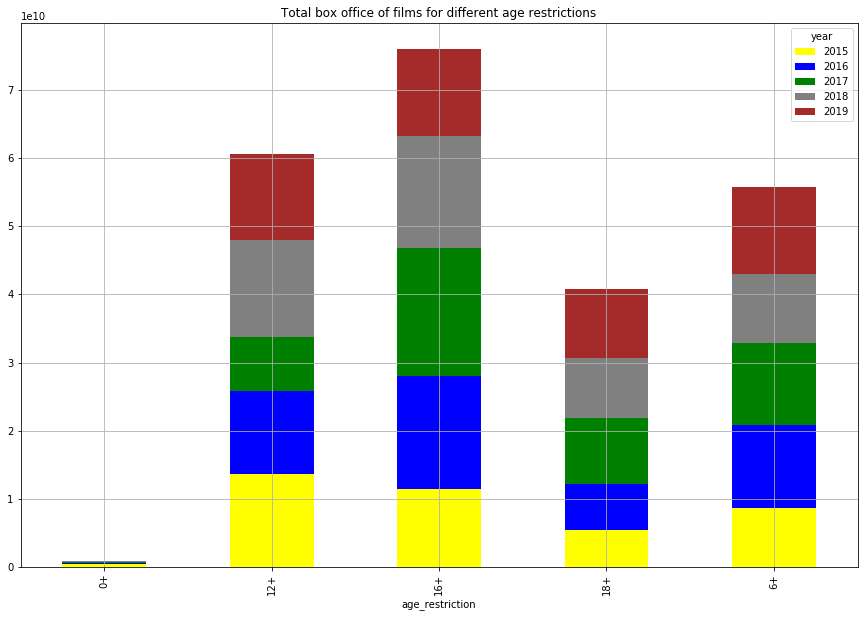

In [38]:
films_age = films[(films.box_office.notna()) & (films.year >= 2015) & (films.year <= 2019)].pivot_table(index='age_restriction', 
                                                        values='box_office', aggfunc=['count','sum','mean','median'])
films_age = films_age.reset_index()
films_age.columns = ['age_restriction', 'number_of_films', 'total_box_office', 'mean_box_office', 'median_box_office']
films_age.age_restriction = ['0+', '12+', '16+', '18+', '6+']

display(films_age)

films_age_by_year = films[(films.box_office.notna()) & 
                          (films.year >= 2015) & 
                          (films.year <= 2019)].pivot_table(index='age_restriction', columns='year', 
                                                            values='box_office', aggfunc='sum')
films_age_by_year = films_age_by_year.reset_index()
films_age_by_year.age_restriction = ['0+', '12+', '16+', '18+', '6+']

display(films_age_by_year)
films_age_by_year.plot.bar(x='age_restriction', y=[2015, 2016, 2017, 2018, 2019], figsize=(15,10), 
                           color=['yellow', 'blue', 'green','gray','brown'], grid=True, stacked=True, 
                           title='Total box office of films for different age restrictions');

films_year_by_age = films[(films.box_office.notna()) & 
                          (films.year >= 2015) & 
                          (films.year <= 2019)].pivot_table(index='year', columns='age_restriction', 
                                                            values='box_office', aggfunc='sum')
films_year_by_age.columns = ['0+', '12+', '16+', '18+', '6+']
display(films_year_by_age )



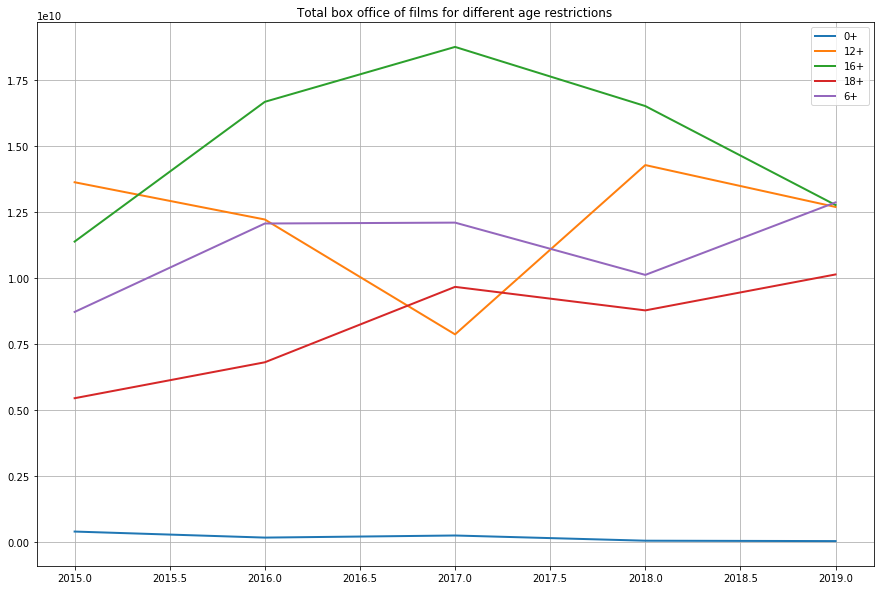

In [39]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(films_year_by_age.index, list(films_year_by_age.iloc[:,0]), 
         films_year_by_age.index,list(films_year_by_age.iloc[:, 1]),
         films_year_by_age.index,list(films_year_by_age.iloc[:, 2]),
         films_year_by_age.index,list(films_year_by_age.iloc[:, 3]),
         films_year_by_age.index,list(films_year_by_age.iloc[:, 4]),
         linewidth=2);
plt.legend(films_year_by_age.columns);
plt.title('Total box office of films for different age restrictions');


##### Вывод

Очевидно, что фильмы с возрастным ограничением 16+ являются лидерами по кассовым сборам, если рассматривать суммарные кассовые сборы за весь временной интервал.

Однако, если рассматривать данные по каждой категории более детально, можно сделать выводы, что:
* в 2015 году категория 12+ имеет больший кассовый сбор, по сравнению со всеми остальными категориями, хотя относительно 16+ разница не очень существенная
* начиная с 2016 года доля 16+ становится преобладающей, хотя в некоторые годы доля 16+ сравнима с 12+.
* суммарные кассовые сборы также варьируются в одной категории в зависимости от года премьерного показа.

Изменение пропорций, вероятнее всего, связано с ужесточением требований министерства культуры к прокатным фильмам, что привело к изменению оценки возрастной категории и, как следствие изменению кассовых сборов по категориям.



### Исследование фильмов с государственной поддержкой

#### Исследование объема государственной поддержки

Ранее уже был выделен сегмент фильмов с государственной поддержкой:

In [40]:
films_gov.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,goverment_support,budget_delta,year,main_genre,main_director,gov_perc
0,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,26500000.0,52911900.0,2013,драма,А.Атанесян,0.333703
1,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,unknown genre,28140.0,26000000.0,11142857.0,2014,unknown genre,А.Якимчук,0.700000
2,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,107847945.0,68175545.0,2013,комедия,Р.Давлетьяров,0.612691
3,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,55917.5,28000000.0,12574140.0,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095
4,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,232100.0,25000000.0,15015122.0,2014,драма,М.Угаров,0.624764


Для начала, проверим, как изменяется полный объем государственной поддержки по годам:

,year,count_gs,sum_gs,mean_gs,med_gs
0,2013,2,1.343479e+08,6.717397e+07,67173972.5
1,2014,16,5.720023e+08,3.575014e+07,27500000.0
2,2015,86,3.656241e+09,4.251444e+07,30000000.0
3,2016,61,4.303155e+09,7.054353e+07,35000000.0
4,2017,41,3.183972e+09,7.765785e+07,40000000.0
5,2018,56,3.446969e+09,6.155303e+07,45000000.0
6,2019,70,4.904000e+09,7.005714e+07,40000000.0


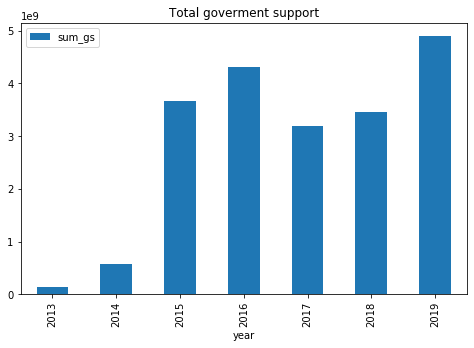

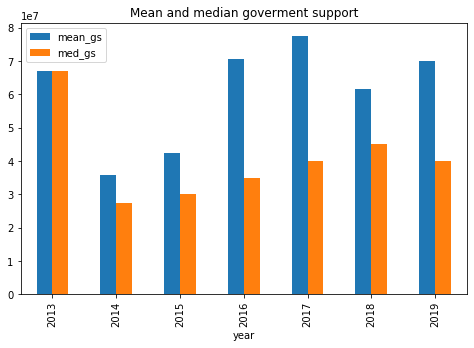

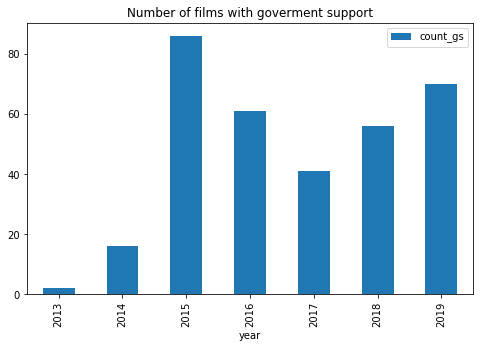

In [41]:
films_gs = films_gov.pivot_table(index='year', values='goverment_support', aggfunc=['count', 'sum','mean','median'])
films_gs.columns = ['count_gs', 'sum_gs', 'mean_gs', 'med_gs']
films_gs = films_gs.reset_index()
display(films_gs)
films_gs.plot.bar(x='year', y='sum_gs', figsize=(8,5), title='Total goverment support');
films_gs.plot.bar(x='year', y=['mean_gs', 'med_gs'], figsize=(8,5), 
                  title='Mean and median goverment support');
films_gs.plot.bar(x='year', y='count_gs', figsize=(8,5), 
                  title='Number of films with goverment support');

Особенности, которые можно выделить, изучив общий объем государственной поддержки:
1. В 2013 году есть информация только о двух фильмах, которые профинансировало государство, как следствие, суммарный объем финансирования гораздо ниже, чем в остальные годы. В 2014 году картина почти такая же, однако, становится выраженной разница между средним и медианой, что говорит о том, что появляются фильмы, которые государство финансирует более активно.
2. В 2015 году происходит резкое увеличение финансирования фильмов. Количество, фильмов, которое профинансировало государство Увеличивается более чем в 4 раза. Начинает увеличиваться относительный разрыв между медианой и средним, что позволяет выдвинуть гипотезу о разных объемах финансирования из разных источников.
3. В 2016 году несколько снижается количество профинансированных фильмов, однако увеличивается объем финансирования. Разница между медианой и средним становится ещё более выраженной.
4. В 2017 году наблюдается сокращение финансирования фильмов, уменьшается объем финансирования и количество профинансированных фильмов. Разрыв между медианой и средним самый большой.
5. После 2017 года начинается увеличение объема финансирования и количества профинансированных фильмов, разрыв между медианой и средним уменьшается.


Теперь проверим, как менялось соотношение возвратных и невозвратных средств при государственном финансировании:

,year,nref,ref,perc_ref
0,2013,1.343479e+08,0.0,0.000000
1,2014,5.010023e+08,71000000.0,14.171592
2,2015,3.019088e+09,637153119.0,21.104156
3,2016,3.381655e+09,921500000.0,27.249967
4,2017,2.464625e+09,719346881.0,29.186872
5,2018,2.784969e+09,662000000.0,23.770458
6,2019,3.976000e+09,928000000.0,23.340040


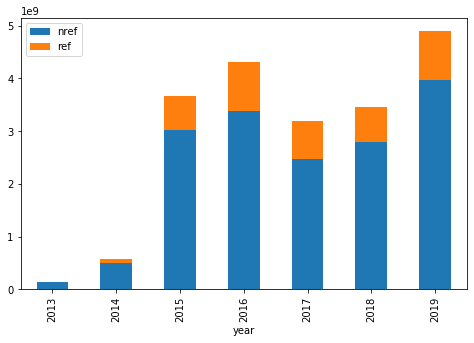

In [42]:
films_ref = films_gov.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
films_ref.columns = ['nref','ref']
films_ref = films_ref.reset_index()
films_ref['perc_ref'] = films_ref.ref / films_ref.nref * 100
display(films_ref)
films_ref.plot.bar(x='year', y=['nref', 'ref'], figsize=(8,5), stacked=True);

Исходя из данных, можно заключить, что начиная с 2015 года объем возвратных средств, находится примерно на одинаковом уровне (от 20% до 30%). До 2015 года объем возвратных средств был существенно ниже.

,year,MK,MK+FK,FK
0,2013,2.650000e+07,0.0,1.078479e+08
1,2014,2.115000e+08,159502299.0,2.010000e+08
2,2015,1.100810e+09,319382174.0,2.236049e+09
3,2016,7.498510e+08,469200000.0,3.084104e+09
4,2017,3.510000e+08,64346881.0,2.768625e+09
5,2018,9.260000e+08,55000000.0,2.465969e+09
6,2019,1.471000e+09,118000000.0,3.315000e+09


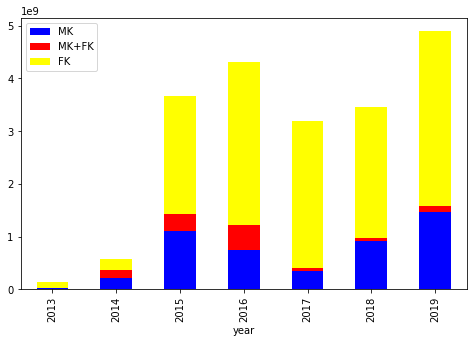

In [43]:
films_source = films_gov.pivot_table(index='year', columns='financing_source', values='goverment_support', aggfunc='sum').fillna(0)
films_source.columns = ['MK','MK+FK','FK']
films_source = films_source.reset_index()
display(films_source)
films_source.plot.bar(x='year', y=['MK', 'MK+FK', 'FK'], figsize=(8,5), color=['blue', 'red', 'yellow'], stacked=True);

Исходя из представленных данных, можно заключить, что основную часть денежных средств предоствляет "Фонд кино".

Изучим топ-5 режиссеров, которым выделяется больше всего государственных средств:

In [44]:
films_gov.pivot_table(index='main_director',
                      values='goverment_support', aggfunc='sum').fillna(0).sort_values(by='goverment_support', 
                                                                                       ascending=False).head()

,goverment_support
main_director,
Н.Хомерики,660000000.0
Ф.Бондарчук,500000000.0
А.Кравчук,500000000.0
Р.Давлетьяров,459847945.0
А.Мизгирев,450000000.0


Самый финансируемый режиссер - Николай Хомерики.

Узнаем, какой жанр фильмов чаще всего спонсирует государство:

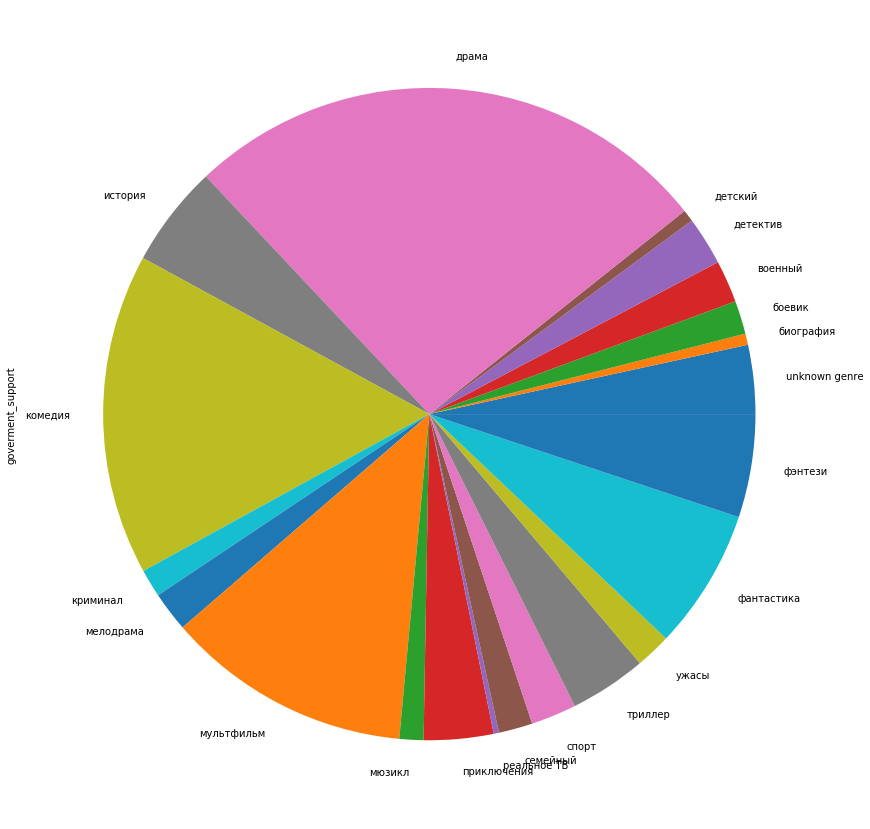

In [45]:
films_genre = films_gov.pivot_table(index='main_genre', values='goverment_support', aggfunc='sum').fillna(0);
films_genre.plot(y='goverment_support', kind='pie', figsize=(15,15), legend=False);

Основное государственное финансирование приходится на драмы, комедии и мультфильмы.

Напоследок узнаем, как объем государственной поддержки коррелирует с остальными параметрами:

,Goverment support
ratings,0.118287
box_office,0.488976
goverment_support,1.000000
budget_delta,0.456796


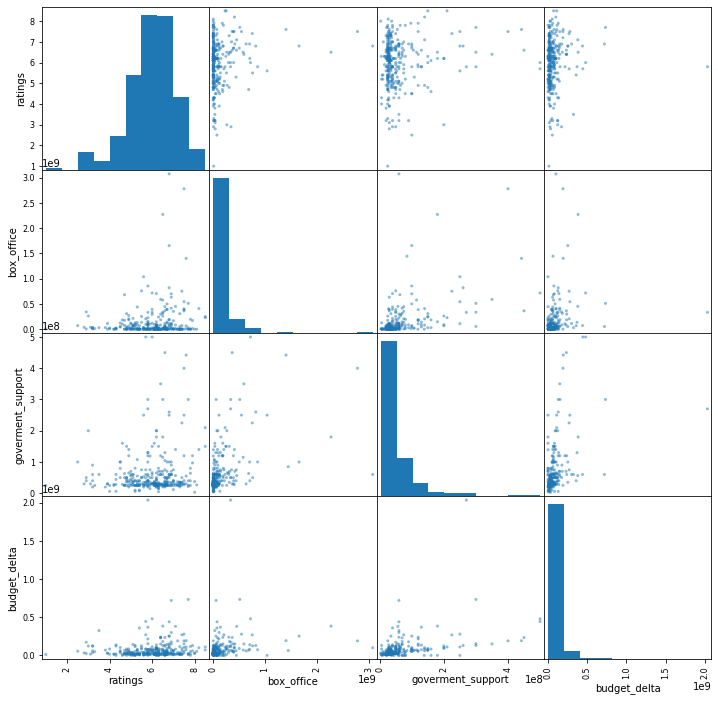

In [46]:
stat_support = pd.DataFrame({'Goverment support' : 
                             films_gov[['ratings', 'box_office', 
                                        'goverment_support', 'budget_delta']].corrwith(films_gov.goverment_support)})
display(stat_support)
pd.plotting.scatter_matrix(films_gov[['ratings', 'box_office', 
                                        'goverment_support', 'budget_delta']], figsize=(12, 12));

Строго говоря, для ряда соотношений вообще некорректно рассчитывать коэффициент корреляции, потому что их поведеие мало похоже на линейное, однако, относительно объема государственного финансирования, возможно выделить основные тенденции:
1. Уровень государственного финансирования слабо положительно коррелирует с рейтингом фильма (при это при малой поддержке государства средняя оценка всё же ниже).
2. Уровень государственного финансирования сильно положительно коррелирует с кассовыми сборами.
3. Уровень государственного финансирования сильно положительно коррелирует с разницей бюджета (т.е. разницей между собственными средствами студии и финансированием государства). Иными словами, чем больше государственная поддержка, тем большее количество собственных средств вкладывает студия.

##### Вывод

В ходе исследования государственного финансирования были установлены следующие важные особенности:
1. Объем государственной поддержки очень сильно зависит от года премьерного показа. В целом, наблюдается тенденция к увеличению финансирования.
2. Объем возвратных средств государственного финансирования в большинстве случаев составляет от 20% до 30% всего выделенного государственного бюджета.
3. Основную часть денежных средств предоставляет Фонд кино.
4. Самый финансируемый режиссер - Николай Хомерики.
5. Основное государственное финансирование приходится на драмы, комедии и мультфильмы.
6. Рейтинг фильмо слабо зависит от объема государственного финансирования, а кассовые сборы и вложенный студией собственный бюджет, напротив, довольно сильно положительно коррелирует.

#### Исследование рейтинга и окупаемости фильмов с государственной поддержкой

Для начала ознакомимся с распределением рейтингов фильмов с государственной поддержкой:

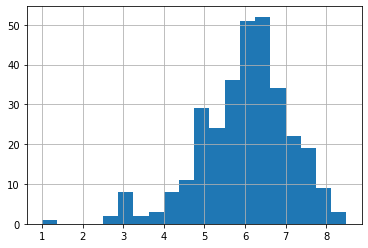

In [47]:
films_gov.ratings.hist(bins=20);

In [48]:
print('Средний рейтинг фильмов с государственной поддержкой: ', round(films_gov.ratings.mean(), 2))
print('Средний рейтинг всех фильмов: ', round(films.ratings.mean(), 2))

Средний рейтинг фильмов с государственной поддержкой:  6.0
Средний рейтинг всех фильмов:  6.48


Наблюдается интересная закономерность в том, что фильмы с государственной поддержкой имеют в среднем более низкий рейтинг, чем все фильмы из набора данных.

Теперь проверим, насколько кассовые сборы позволяют покрыть расходы на съемки фильма. Для этого введем в рассмотрение разницу кассовых сборов и общего бюджета фильма, а также дополнительно отметим убыточные фильмы:

Доля убыточных фильмов:  0.72


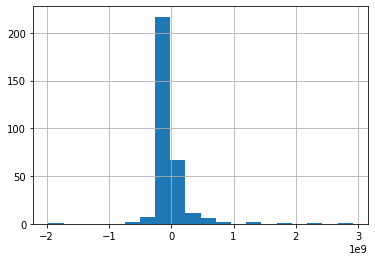

In [49]:
films_gov['profit'] = films_gov.box_office - films_gov.budget;
films_gov['loss'] = films_gov.profit < 0

films_gov.profit.hist(bins=20);
print('Доля убыточных фильмов: ', round(films_gov.loss.mean(),2))

Более 70% всех фильмов с государственной поддержкой являются убыточными, если рассматривать как доход только кассовые сборы в кинотеатрах.

Напоследок проверим средний рейтинг убыточных и прибыльных фильмов:

In [50]:
print('Средний рейтинг убыточных фильмов:', 
      round(films_gov[films_gov.loss == True].ratings.mean(), 2))
print('Средний рейтинг прибыльных фильмов:', 
      round(films_gov[films_gov.loss == False].ratings.mean(),2))

Средний рейтинг убыточных фильмов: 5.98
Средний рейтинг прибыльных фильмов: 6.05


Довольно неожиданный результат: фильмы, которые убыточные с точки зрения кассовых сборов нравятся зрителям в среднем так же, как и прибыльные фильмы.

##### Вывод

По результатам исследования рейтингов и окупаемости фильмов с государственной поддержкой можно сделать следующие выводы:
1. Фильмы с государственной поддержкой в среднем пользователи оценивают несколько ниже, чем фильмы из набора данных "в целом".
2. Более 70% фильмов с государственной поддержкой не окупаются.
3. Средний неокупившихся фильмов практически такой же, как и у прибыльных.

### Общий вывод

В ходе исследования были выполнены следующие этапы:
1. Произведено объединение данных из различных источников, проведен их общий обзор и выделены основные проблемы.
2. Проведена предварительная обработка данных, устранены пропуски (там, где это возможно) и дубликаты, а также изменены типы данных некоторых столбцов.
3. Проведен исследовательский анализ данных и сформированы выводы в каждом логическом блоке.

Основные выводы:
1. Наблюдается тенденция к увеличению числа снятых фильмов. Количество фильмов, которые транслируются в кинотеатрах, также увеличивается.
2. До 2015 года наблюдался рост кассовых сборов, после 2015 года - стагнация.
3. Наблюдается тенденция к увеличению фильмов, которые нравятся зрителям.
4. Максимально высокие кассовые сборы приходятся на 2018 год, а самые минимальные на 2010 год.
5. Фильмы с возрастным ограничением 16+ имеют самые высокие кассовые сборы.
6. Наблюдается тенденция к увеличению государственного финансирования фильмов.
7. Основную часть государственного финансирования предоставляет Фонд кино.
8. Основное государственное финансирование приходится на драмы, комедии и мультфильмы.
9. Рейтинг фильмо слабо зависит от объема государственного финансирования, а кассовые сборы и вложенный студией собственный бюджет, напротив, довольно сильно положительно коррелирует.
10. Более 70% фильмов с государственной поддержкой не окупаются.
11. Фильмы с государственной поддержкой имеют, в среднем, более низкий рейтинг.